In [120]:
import pandas as pd
from sklearn import linear_model
import seaborn as sns
df=pd.read_csv("car_price_dataset.csv")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [86]:
df.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [87]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [88]:
Brand=pd.get_dummies(df['Brand'])

In [89]:
Model=pd.get_dummies(df['Model'])

In [90]:
Fuel_Type=pd.get_dummies(df['Fuel_Type'])

In [91]:
Transmission=pd.get_dummies(df['Transmission'])

In [92]:
df.drop(["Brand","Model","Fuel_Type","Transmission"],axis=1,inplace=True)

In [93]:
df=pd.concat([df,Brand],axis=1)
df=pd.concat([df,Model],axis=1)
df=pd.concat([df,Fuel_Type],axis=1)
df=pd.concat([df,Transmission],axis=1)

In [105]:
reg=linear_model.LinearRegression()
reg.fit(df.drop('Price',axis='columns'),df['Price'])

LinearRegression()

In [107]:
reg.coef_

array([ 2.98601356e+02,  9.92739311e+02, -1.98902438e-02, -5.50438929e-01,
        3.58753186e-02,  7.93782169e+06,  8.57264060e+07,  2.99605041e+07,
        4.77730782e+07,  2.42916951e+07,  5.56343367e+07,  3.62589034e+07,
       -3.36718271e+07,  6.81668214e+07,  5.85635755e+07, -3.67501191e+07,
       -3.67501262e+07,  4.10384639e+07,  4.10384596e+07,  2.46845954e+07,
        8.26481159e+07,  2.46845951e+07, -1.91905400e+07,  2.46846025e+07,
       -1.91905371e+07,  8.26481131e+07, -6.65805335e+06,  1.90157787e+07,
        1.20320956e+06,  1.20320731e+06,  1.20321048e+06,  8.26481228e+07,
       -9.58729061e+06,  1.90157836e+07,  1.90157816e+07,  1.27173897e+07,
       -9.58728978e+06,  4.10384618e+07, -1.91905291e+07,  1.27173897e+07,
       -6.65805214e+06,  1.27173903e+07, -9.58729063e+06, -6.65804953e+06,
       -3.67501138e+07, -1.07369880e+07, -1.07350001e+07, -1.07359977e+07,
       -1.07369869e+07, -1.79773965e+07, -1.79788868e+07, -1.79788885e+07])

In [109]:
reg.intercept_

-20853476.676488727

In [113]:
print(df.columns)


Index(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price',
       'Audi', 'BMW', 'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Kia',
       'Mercedes', 'Toyota', 'Volkswagen', '3 Series', '5 Series', 'A3', 'A4',
       'Accord', 'C-Class', 'CR-V', 'Camry', 'Civic', 'Corolla', 'E-Class',
       'Elantra', 'Equinox', 'Explorer', 'Fiesta', 'Focus', 'GLA', 'Golf',
       'Impala', 'Malibu', 'Optima', 'Passat', 'Q5', 'RAV4', 'Rio', 'Sonata',
       'Sportage', 'Tiguan', 'Tucson', 'X5', 'Diesel', 'Electric', 'Hybrid',
       'Petrol', 'Automatic', 'Manual', 'Semi-Automatic'],
      dtype='object')


In [128]:
top_10_brands = df["Brand"].value_counts()
print(top_10_brands)


Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64


In [132]:
import matplotlib.pyplot as plt

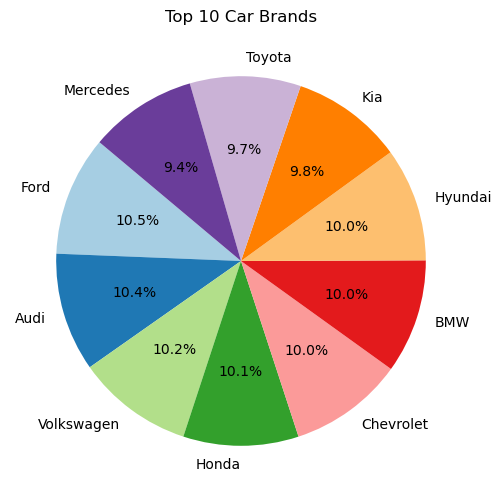

In [134]:
plt.figure(figsize=(8, 6))
plt.pie(top_10_brands, labels=top_10_brands.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 10 Car Brands")
plt.show()


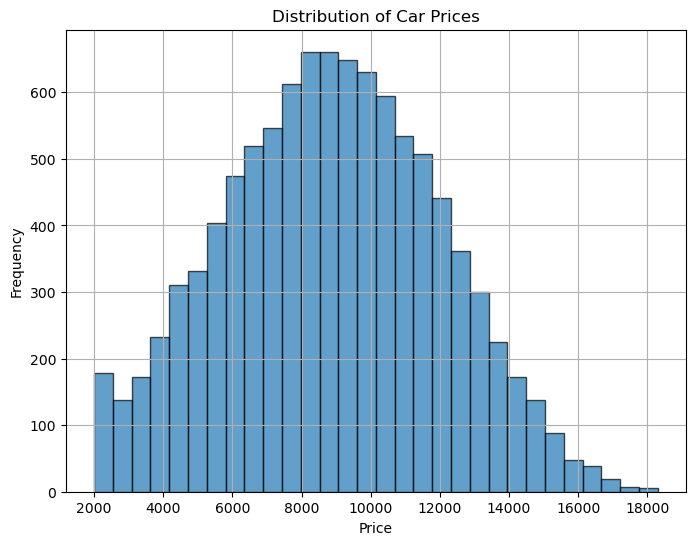

In [136]:
plt.figure(figsize=(8, 6))
plt.hist(df["Price"], bins=30, edgecolor="black", alpha=0.7)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

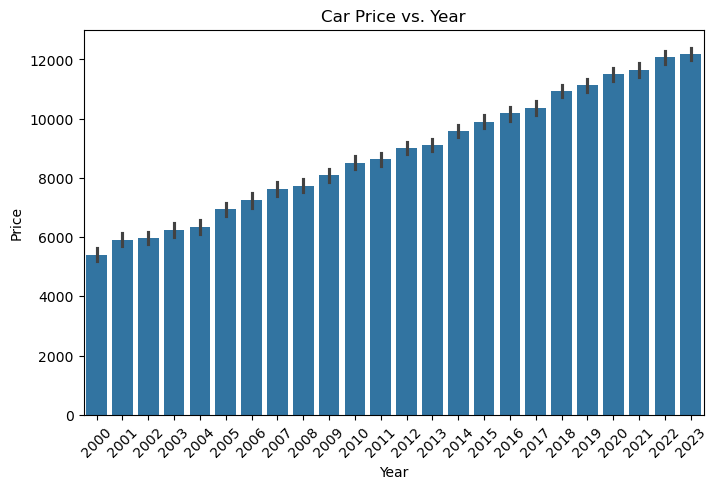

In [154]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Year"], y=df["Price"])
plt.title("Car Price vs. Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()